# Filtragem no domínio espacial

A convolução é uma operação matemática sobre duas funções (**f(x)** e **g(x)**) que produz uma terceira função (**f(x) * g(x)**). Ela é definida como a integral do produto das duas funções após uma delas ser refletida sobre o eixo y e deslocada (devido à propriedade de comutatividade, a escolha de qual função é refletida e deslocada não altera o resultado). A integral é avaliada para todos os valores de deslocamento, produzindo a função de convolução. É interessante notar que o termo convolução se refere tanto à função resultante quanto ao processo de computá-la.

A convolução e operações relacionadas possuem muitas aplicações em ciências, engenharia e matemática. A convolução discreta, por exemplo, permite construir filtros aplicados ao processamento de imagens digitais, como veremos nos exemplos abaixo de filtros suavizantes.

Para informações mais detalhadas e exemplos sobre a operação de convolução, cheque o artigo da [Wikipedia](https://en.wikipedia.org/wiki/Convolution).

## Filtro suavizante

Filtros suavizantes são aqueles que reduzem a nitidez da imagem fazendo uma média (aritmética ou ponderada) na janela do kernel. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

### Filtro da média

O filtro da média é composto por um kernel quadrado com pesos iguais. Os pesos são divididos pelo número de elementos do kernel, para não alterar a intensidade da imagem. Para realizar a operação de filtragem, depois de criarmos o kernel, utilizamos a função **convolve()** da biblioteca **scipy.ndimage**, que faz a varredura da imagem pelo filtro.

kernel=
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


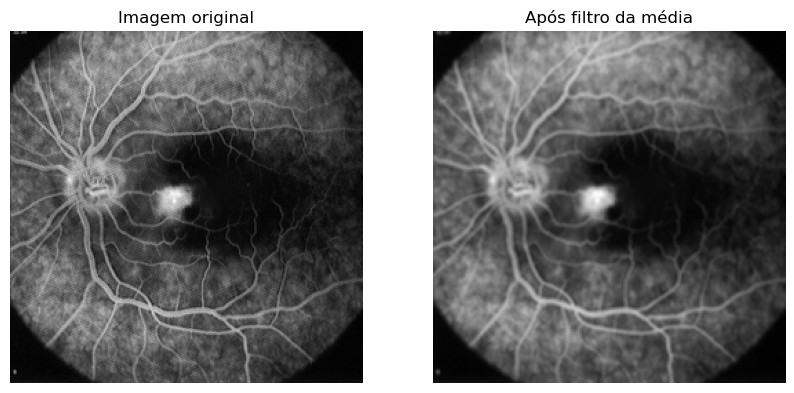

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import convolve

f = mpimg.imread('../data/retina.tif')
s = 3
k = np.ones((s,s))/(s*s)

f_conv_fmean = convolve(f,k)

print('kernel=\n',k)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Após filtro da média')
plt.imshow(f_conv_fmean, cmap='gray')
plt.axis('off');

### Filtro Gaussiano

Assim como o filtro da média, o filtro gaussiano é composto por um kernel quadrado, onde os elementos são pesos de uma gaussiana bidimensional. Para que o filtro gaussiano não altere a intensidade da imagem, divide-se a máscara gaussiana pelo somatória de todos os elementos da máscara.

kernel=
 [[0.075 0.124 0.075]
 [0.124 0.204 0.124]
 [0.075 0.124 0.075]]


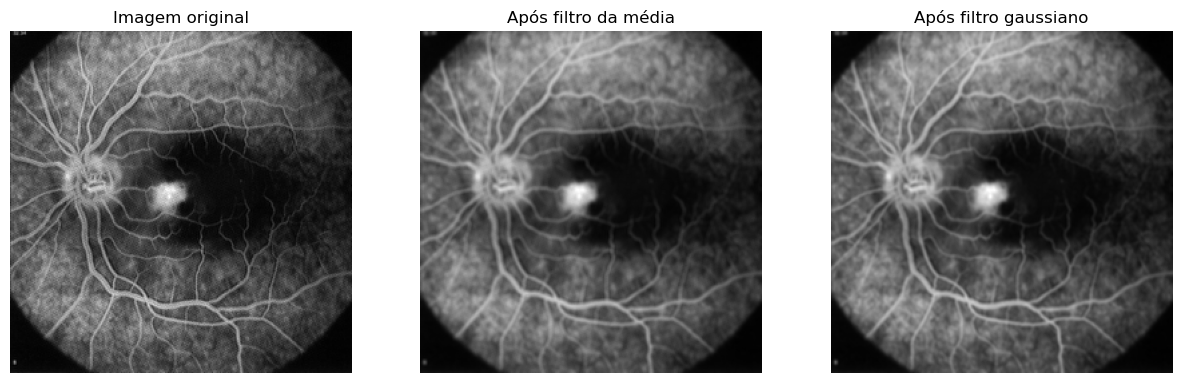

In [4]:
# Gaussiana 2D (direta)
x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
d = x*x+y*y
sigma = 1.
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização

f_conv_fgauss = convolve(f,gauss)

print('kernel=\n', gauss.round(3))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Após filtro da média')
plt.imshow(f_conv_fmean, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Após filtro gaussiano')
plt.imshow(f_conv_fgauss, cmap='gray')
plt.axis('off');